In [1]:
import tango
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import time
Z = 1
X = 2
Y = 3

## Init the Shutter controlled by a Arduino Tango communication

In [31]:
#insert arduino serial port to initialize connection with arduino
Arduino_Shutter = tango.DeviceProxy("voxel/Arduino_Shutter/1")
print(Arduino_Shutter.state())
Arduino_Shutter.set_timeout_millis(10000)


ON


In [32]:
ArduinoInfo =   {
                    "Name"      : "AS1",
                    "COM"       : 4
                }
ArduinoInfo = json.dumps(ArduinoInfo)
Arduino_Shutter.Connect(ArduinoInfo)

'Device is connected'

## Init the Shutter controlled by a Newport AG_UC8 Tango communication

In [8]:
#insert arduino serial port to initialize connection with AG_UC8 
import tango
import json
N_AG_UC8 = tango.DeviceProxy("voxel/ag_uc8/1")
N_AG_UC8.set_timeout_millis(120000)
print(N_AG_UC8.state())


ON


In [9]:
AG_UC8 = {
            "Name"      : "Controller_1",
            "COM"       : 6,   
         }

AG_UC8 = json.dumps(AG_UC8)
print(N_AG_UC8.Connect(AG_UC8))

ola


## Init the SMC100 Tango communication

In [73]:
#insert motors' serial port to initialize connection with motors
SMC100 = tango.DeviceProxy("voxel/SMC100/1")
print(SMC100.state())
SMC100.set_timeout_millis(50000)

ON


In [75]:
userInfoController =  {
                            "Name"                  : "SC1",
                            "COM"                   : 5,
                            "Number_of_controllers" : 3
                        }
userInfoController=json.dumps(userInfoController)
SMC100.ConnectCamera(userInfoController)

CommunicationFailed: DevFailed[
DevError[
    desc = TRANSIENT CORBA system exception: TRANSIENT_CallTimedout
  origin = Connection::command_inout()
  reason = API_CorbaException
severity = ERR]

DevError[
    desc = Timeout (50000 mS) exceeded on device voxel/smc100/1, command ConnectCamera
  origin = Connection::command_inout()
  reason = API_DeviceTimedOut
severity = ERR]
]

## Init the Thorlabs Camera Tango communication

In [38]:
ThorlabsCamera =  tango.DeviceProxy("camera/thorlabs/zelux44")
print(ThorlabsCamera.state())
ThorlabsCamera.set_timeout_millis(9000)

RUNNING


### Need to change parameters of the camera using this function

In [37]:
ThorlabsCamera.StartAcqusition()

''

In [5]:
ThorlabsCamera.StopAcqusition()

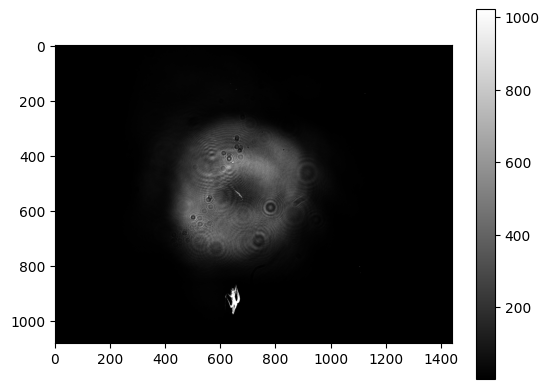

In [39]:
# ThorlabsCamera.Snap()
plt.imshow(ThorlabsCamera.Image,cmap="grey")
plt.colorbar()

# Standa Motor

In [3]:
Standa = tango.DeviceProxy("voxel/StandaM/1")
print(Standa.state())
Standa.set_timeout_millis(120000)

ON


In [4]:
Standa.get_command_list()

['Init', 'State', 'Status', 'connection', 'get_list_diveces', 'get_position', 'move_calibrat', 'move_to', 'relative_shift', 'set_device', 'set_device_as_virtual', 'set_user_unit', 'set_zero']

In [5]:
Standa.get_list_diveces()

"Dice found: {'uri': 'xi-com:\\\\\\\\.\\\\COM8', 'device_serial': 0, 'Manufacturer': '', 'ManufacturerId': '', 'ProductDescription': '', 'Major': 0, 'Minor': 0, 'Release': 0, 'ControllerName': '', 'CtrlFlags': 0, 'PositionerName': ''}\t{'uri': 'xi-com:\\\\\\\\.\\\\COM3', 'device_serial': 0, 'Manufacturer': '', 'ManufacturerId': '', 'ProductDescription': '', 'Major': 0, 'Minor': 0, 'Release': 0, 'ControllerName': '', 'CtrlFlags': 0, 'PositionerName': ''}\t"

In [6]:
Standa.set_device('8')

'it was selected the device 8'

In [7]:
Standa.connection("open")

'Connection established'

### Function that recives the Coord and send it to te Controller via Tango

In [76]:
def MoveToPosition(coords):
    userInfoP = {
                    "Name" : "SC1",
                    "Axis" : X
                }
    userInfoP_String = json.dumps(userInfoP)
    current_position_x = SMC100.GetPosition(userInfoP_String)
    print("Position X:"+str(current_position_x))
    userInfoP["Axis"] = Y
    userInfoP_String = json.dumps(userInfoP)
    current_position_y = SMC100.GetPosition(userInfoP_String)
    print("Position Y:"+str(current_position_y))
    userInfoP["Axis"] = Z
    userInfoP_String = json.dumps(userInfoP)
    current_position_z = SMC100.GetPosition(userInfoP_String)
    print("Position Z:"+str(current_position_z))

    # print(current_position_x)
    # print(current_position_y)

    userInfoMA =    {
                        "Name"              : "SC1",
                        "Axis"              : Z,
                        "Position"          : 5,
                        "Wait_to_finish"    : False
                    }
    print(len(coords))
    if len(coords) == 3:
        if coords[0] != current_position_x:
            userInfoMA["Axis"] = X
            userInfoMA["Position"] = coords[0]
            userInfoMA_string = json.dumps(userInfoMA)
            SMC100.MoveAbsolute_mm(userInfoMA_string)

        if coords[1] != current_position_y:
            
            userInfoMA["Axis"] = Y
            userInfoMA["Position"] = coords[1]
            userInfoMA_string = json.dumps(userInfoMA)
            SMC100.MoveAbsolute_mm(userInfoMA_string)
        
        if coords[2] != current_position_z:
            
            userInfoMA["Axis"] = Z
            userInfoMA["Position"] = coords[2]
            userInfoMA_string = json.dumps(userInfoMA)
            SMC100.MoveAbsolute_mm(userInfoMA_string)

        # elif coords[0]!=current_position_x and coords[1]!=current_position_y:
        #     userInfoMA["Wait_to_finish" ] = False
        #     userInfoMA["Axis"] = Y
        #     userInfoMA["Position"] = coords[1]
        #     userInfoMA_string = json.dumps(userInfoMA)
        #     SMC100.MoveAbsolute_mm(userInfoMA_string)
        #     userInfoMA["Axis"] = X
        #     userInfoMA["Position"] = coords[0]
        #     userInfoMA_string = json.dumps(userInfoMA)
        #     SMC100.MoveAbsolute_mm(userInfoMA_string)

    else:
        print("Error: Wrong input. Please insert a position to which you want to move as x, y, z",
            "(e.g. the input of 1.2, 3.3 will move the motors to a position where x=1.2 mm and y=3.3 mm)")

Simple test of the movement of the motors 

In [77]:
#run to make a move to a desired position

a = input("insert a desired position [mm] as a pair x, y, z: ") 
coords = list(float(x) for x in a.split(","))
MoveToPosition(coords)


Position X:-0.0
Position Y:-0.0
Position Z:-0.0
3


# The experiment code 

In [ ]:
polaroide_info = {
            "Name"      : "Controller_1",
            "Channel"   : 1,
            "Axis"      : 1,
            "Position"  : 0
        }
tilt_info = {
            "Name"      : "Controller_1",
            "Channel"   : 2,
            "Axis"      : 2,
            "Position"  :  0
        }

Device_to_Open =    {
                        "Name"      : "AS1"
                    }
Device_to_Open_string = json.dumps(Device_to_Open)

def function_experiment(polaroide,open_Iris,tilt_1,tilt_2,move_X,move_Y,area=[[100,800],[100,800]]):

    # Move the Polaroide piezo motor
    polaroide_info["Position"]=polaroide
    polaroide_string = json.dumps(polaroide_info)
    N_AG_UC8.MoveRel(polaroide_string)

    
    Standa.move_to(open_Iris)

    
    tilt_info["Axis"] = 1
    tilt_info["Position"] = tilt_1
    til_sting = json.dumps(tilt_info)
    N_AG_UC8.MoveRel(til_sting)

    
    tilt_info["Axis"] = 2
    tilt_info["Position"] = tilt_2
    til_sting = json.dumps(tilt_info)
    N_AG_UC8.MoveRel(til_sting)
    

    MoveToPosition([move_X,move_Y,0])

    Arduino_Shutter.OpenShutter(Device_to_Open_string)
    ThorlabsCamera.Snap()
    Arduino_Shutter.CloseShutter(Device_to_Open_string)
    Image_to_evalute = ThorlabsCamera.Image
    plt.imshow(Image_to_evalute,cmap="grey")
    plt.colorbar()
    plt.show()

    area_of_study = Image_to_evalute[area[0][0]:area[0][1],area[1][0]:area[1][1]]
    val = -1* np.mean(area_of_study)

    return val, Image_to_evalute, area_of_study
    
